# Control CC Mice Principal Component Analysis

__Author:__ Bryan Quach  
__Date:__ May 15, 2017

## Objective

### Estimated Analysis Time: <1 day*

Using single-end RNA-seq data from the TaRGET project Collaborative Cross (CC) mice, the goal of this analysis is to perform PCA on only the control samples to see if any of the samples appear to be outliers. We will use expression data that has been processed into a form that is input into our in-house eQTL software.

**This estimate optimistically assumes that the analysis will be done as shown below without interruption, with an internet connection with high speed data transfer rates, and with all necessary software already installed. Limitations in internet data transfer rates and software installation can significantly increase analysis time.*

## Data retrieval and wrangling

In [11]:
# Load data
lung.data <- readRDS("data//expmat_control_lung.rds")
liver.data <- readRDS("data//expmat_control_liver.rds")
kidney.data <- readRDS("data//expmat_control_kidney.rds")

#Log transform
lung.data.log <- log10(lung.data+1)
liver.data.log <- log10(liver.data+1)
kidney.data.log <- log10(kidney.data+1)

## Principal Component Analysis and Clustering

In [17]:
#Run PCA and get % variance
pca.results.liver <- prcomp(liver.data.log, center=T, scale.=T)
pca.results.lung <- prcomp(lung.data.log, center=T, scale.=T)
pca.results.kidney <- prcomp(kidney.data.log, center=T, scale.=T)
dspace.liver <- pca.results.liver$x #transformed dataspace
dspace.lung <- pca.results.lung$x #transformed dataspace
dspace.kidney <- pca.results.kidney$x #transformed dataspace

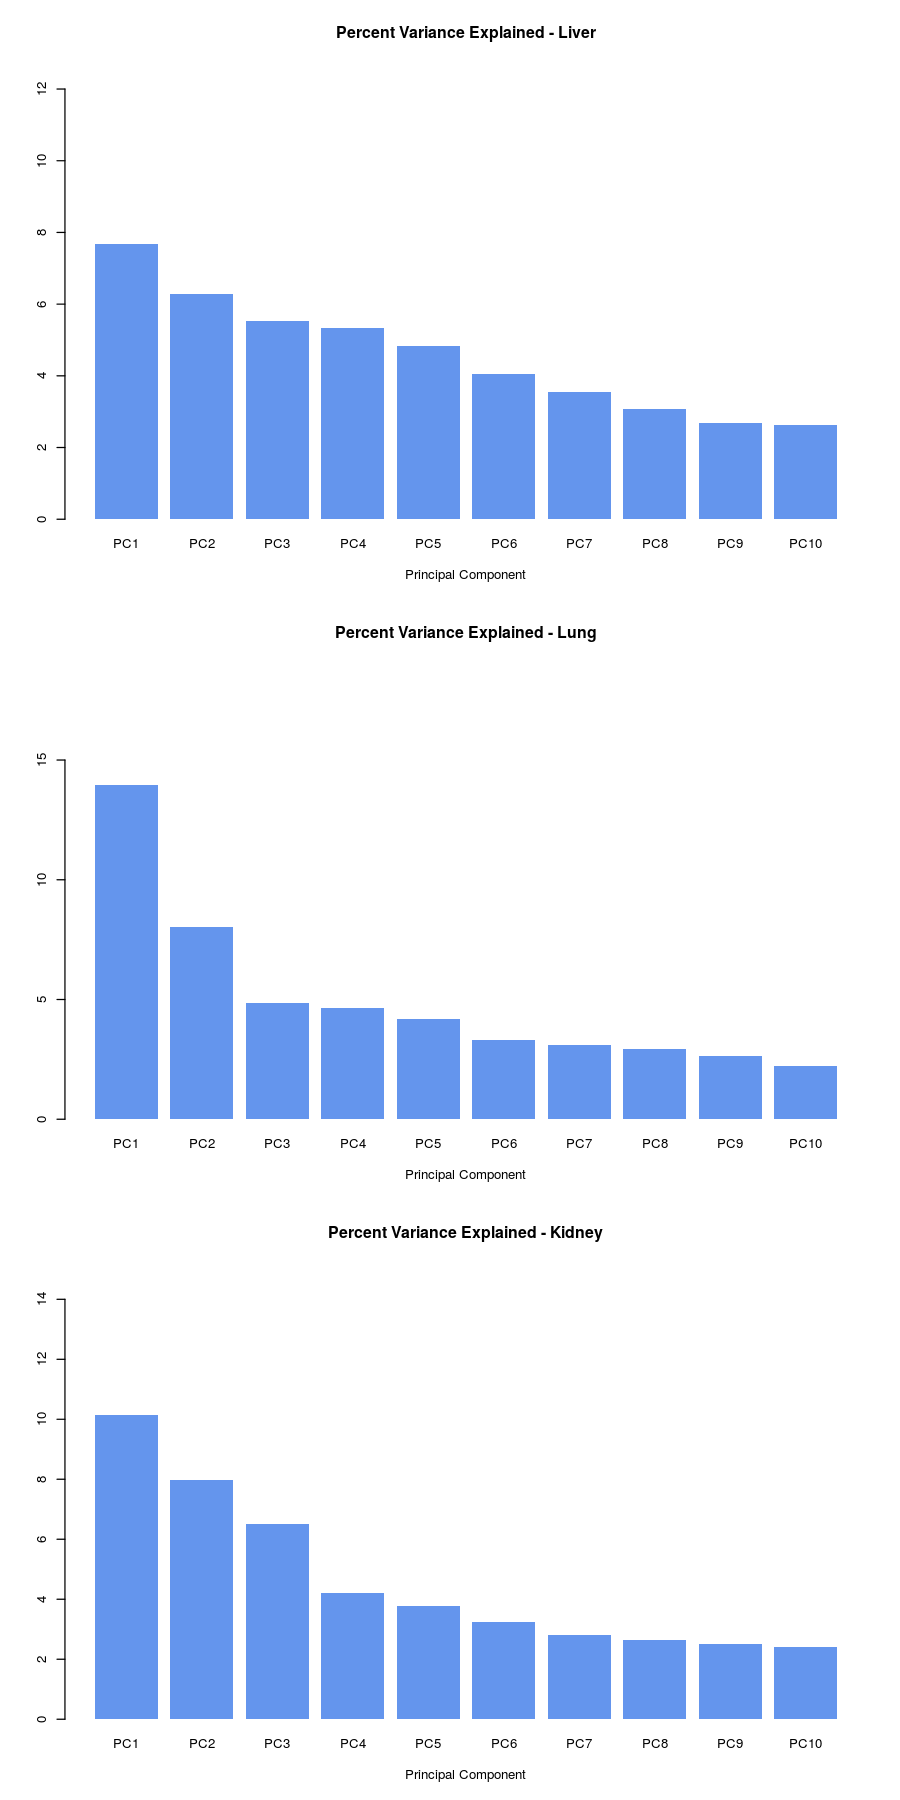

In [19]:
#Define plot properties
library(repr)
options(repr.plot.width=7.5, repr.plot.height=15)

#Percent of Variance Explained for PCs 1-10
par(mfrow=c(3,1))
pca.var.liver <- summary(pca.results.liver)
pca.var.lung <- summary(pca.results.lung)
pca.var.kidney <- summary(pca.results.kidney)
barplot(pca.var.liver$importance[2,1:10]*100, 
        col="cornflowerblue", 
        border=NA, 
        main="Percent Variance Explained - Liver", 
        xlab="Principal Component", 
        ylim=c(0, max(pca.var.liver$importance[2,1:10]*100)+5))
barplot(pca.var.lung$importance[2,1:10]*100, 
        col="cornflowerblue", 
        border=NA, 
        main="Percent Variance Explained - Lung", 
        xlab="Principal Component", 
        ylim=c(0, max(pca.var.lung$importance[2,1:10]*100)+5))
barplot(pca.var.kidney$importance[2,1:10]*100, 
        col="cornflowerblue", 
        border=NA, 
        main="Percent Variance Explained - Kidney", 
        xlab="Principal Component", 
        ylim=c(0, max(pca.var.kidney$importance[2,1:10]*100)+5))

In the truncated scree plots above, the reduction in variance explained with each additional PC is not as drastic as in previous analyses, so we will explore up to PC5.

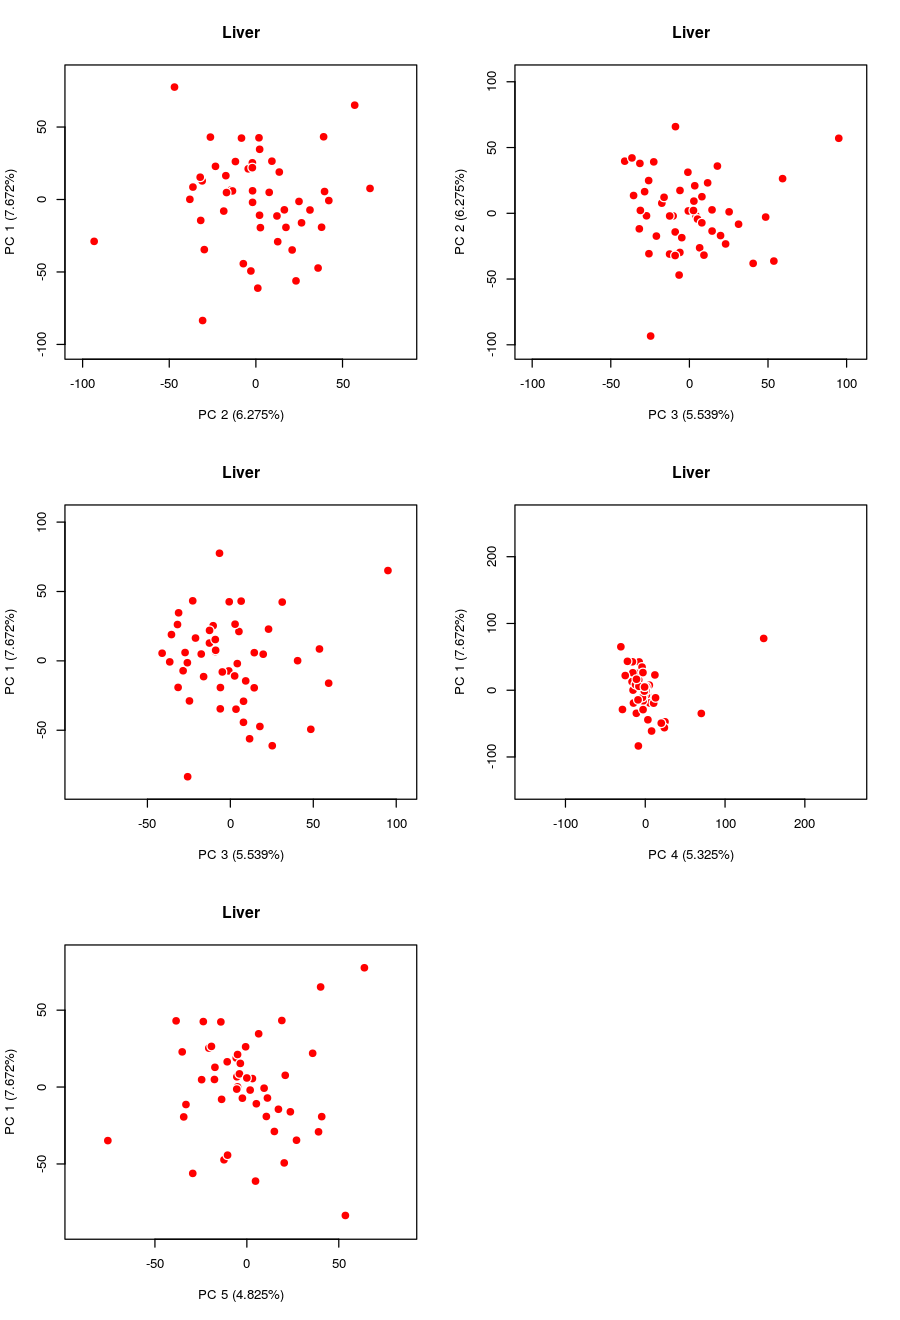

In [20]:
#PCA plots for liver tissue

#Define plot properties
pc1.pov <- pca.var.liver$importance[2,1]*100
pc2.pov <- pca.var.liver$importance[2,2]*100
pc3.pov <- pca.var.liver$importance[2,3]*100
pc4.pov <- pca.var.liver$importance[2,4]*100
pc5.pov <- pca.var.liver$importance[2,5]*100
options(repr.plot.width=7.5, repr.plot.height=11)
colors <- "red"
sample.names <- rownames(dspace.liver)
scale = 1.1
plot.lim1 = c(min(dspace.liver[,1], dspace.liver[,2])*scale, max(dspace.liver[,1], dspace.liver[,2])*scale)
plot.lim2 = c(min(dspace.liver[,3], dspace.liver[,2])*scale, max(dspace.liver[,3], dspace.liver[,2])*scale)
plot.lim3 = c(min(dspace.liver[,1], dspace.liver[,3])*scale, max(dspace.liver[,1], dspace.liver[,3])*scale)
plot.lim4 = c(min(dspace.liver[,1], dspace.liver[,4])*scale*1.6, max(dspace.liver[,1], dspace.liver[,4])*scale*1.6)
plot.lim5 = c(min(dspace.liver[,1], dspace.liver[,5])*scale, max(dspace.liver[,1], dspace.liver[,5])*scale)
pc1.label = paste("PC 1 (",pc1.pov,"%)",sep="")
pc2.label = paste("PC 2 (",pc2.pov,"%)",sep="")
pc3.label = paste("PC 3 (",pc3.pov,"%)",sep="")
pc4.label = paste("PC 4 (",pc4.pov,"%)",sep="")
pc5.label = paste("PC 5 (",pc5.pov,"%)",sep="")

par(mfrow=c(3,2))
#PC1 vs PC2
plot(y=dspace.liver[,1], x=dspace.liver[,2], pch=21, col="white", bg=colors, 
     xlim=plot.lim1, ylim=plot.lim1,
     ylab=pc1.label, xlab=pc2.label,
     cex=1.5, 
     main="Liver")

#PC2 vs PC3
plot(y=dspace.liver[,2], x=dspace.liver[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim2, ylim=plot.lim2, 
     ylab=pc2.label, xlab=pc3.label,
     cex=1.5, 
     main="Liver")

#PC1 vs PC3
plot(y=dspace.liver[,1], x=dspace.liver[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim3, ylim=plot.lim3, 
     ylab=pc1.label, xlab=pc3.label,
     cex=1.5, 
     main="Liver")

#PC1 vs PC4
plot(y=dspace.liver[,1], x=dspace.liver[,4], pch=21, col="white", bg=colors, 
     xlim=plot.lim4, ylim=plot.lim4, 
     ylab=pc1.label, xlab=pc4.label,
     cex=1.5, 
     main="Liver")

#PC1 vs PC5
plot(y=dspace.liver[,1], x=dspace.liver[,5], pch=21, col="white", bg=colors, 
     xlim=plot.lim5, ylim=plot.lim5, 
     ylab=pc1.label, xlab=pc5.label,
     cex=1.5, 
     main="Liver")



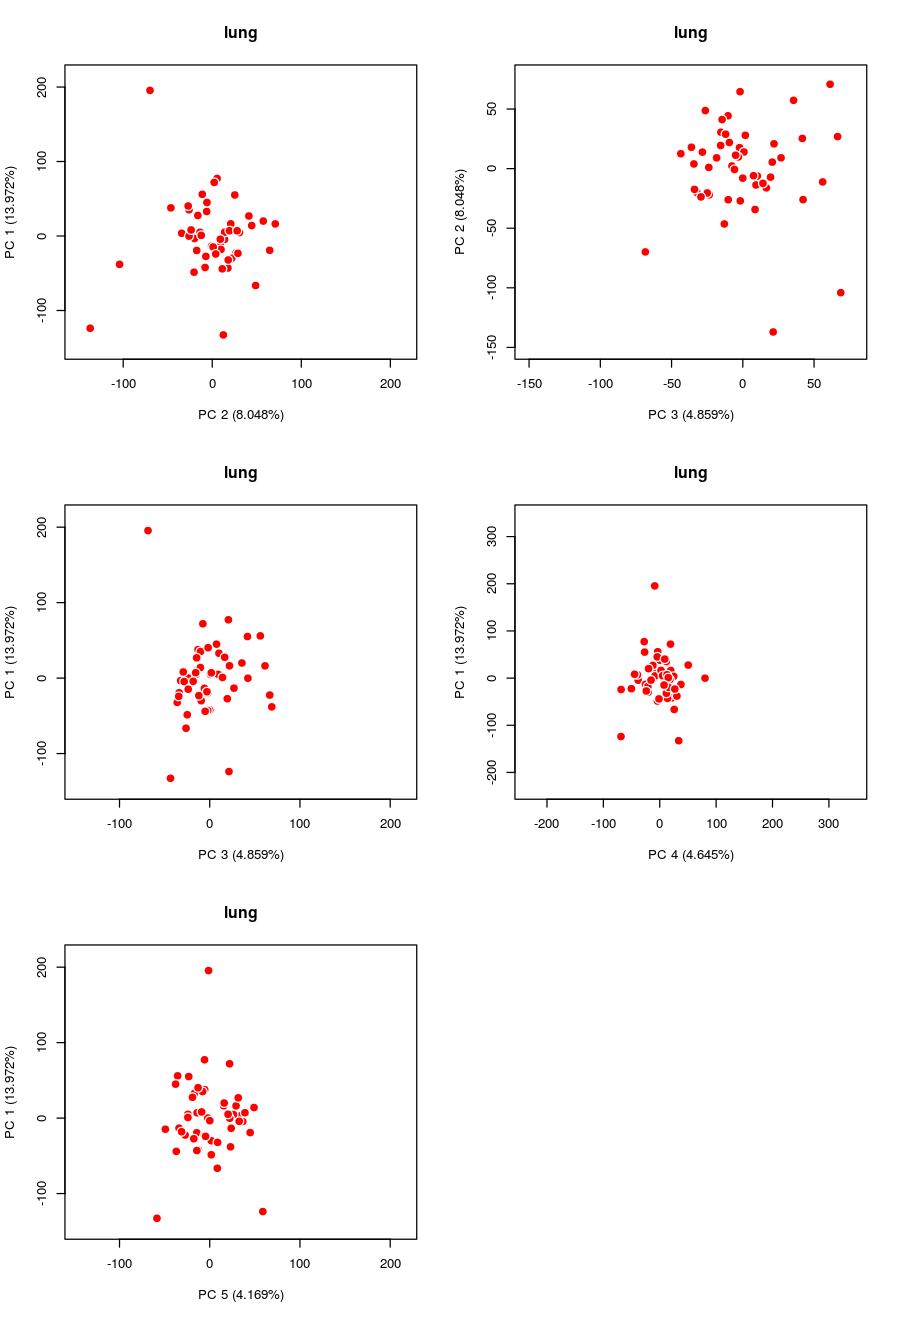

In [21]:
#PCA plots for lung tissue

#Define plot properties
pc1.pov <- pca.var.lung$importance[2,1]*100
pc2.pov <- pca.var.lung$importance[2,2]*100
pc3.pov <- pca.var.lung$importance[2,3]*100
pc4.pov <- pca.var.lung$importance[2,4]*100
pc5.pov <- pca.var.lung$importance[2,5]*100
options(repr.plot.width=7.5, repr.plot.height=11)
colors <- "red"
sample.names <- rownames(dspace.lung)
scale = 1.1
plot.lim1 = c(min(dspace.lung[,1], dspace.lung[,2])*scale, max(dspace.lung[,1], dspace.lung[,2])*scale)
plot.lim2 = c(min(dspace.lung[,3], dspace.lung[,2])*scale, max(dspace.lung[,3], dspace.lung[,2])*scale)
plot.lim3 = c(min(dspace.lung[,1], dspace.lung[,3])*scale, max(dspace.lung[,1], dspace.lung[,3])*scale)
plot.lim4 = c(min(dspace.lung[,1], dspace.lung[,4])*scale*1.6, max(dspace.lung[,1], dspace.lung[,4])*scale*1.6)
plot.lim5 = c(min(dspace.lung[,1], dspace.lung[,5])*scale, max(dspace.lung[,1], dspace.lung[,5])*scale)
pc1.label = paste("PC 1 (",pc1.pov,"%)",sep="")
pc2.label = paste("PC 2 (",pc2.pov,"%)",sep="")
pc3.label = paste("PC 3 (",pc3.pov,"%)",sep="")
pc4.label = paste("PC 4 (",pc4.pov,"%)",sep="")
pc5.label = paste("PC 5 (",pc5.pov,"%)",sep="")

par(mfrow=c(3,2))
#PC1 vs PC2
plot(y=dspace.lung[,1], x=dspace.lung[,2], pch=21, col="white", bg=colors, 
     xlim=plot.lim1, ylim=plot.lim1,
     ylab=pc1.label, xlab=pc2.label,
     cex=1.5, 
     main="lung")

#PC2 vs PC3
plot(y=dspace.lung[,2], x=dspace.lung[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim2, ylim=plot.lim2, 
     ylab=pc2.label, xlab=pc3.label,
     cex=1.5, 
     main="lung")

#PC1 vs PC3
plot(y=dspace.lung[,1], x=dspace.lung[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim3, ylim=plot.lim3, 
     ylab=pc1.label, xlab=pc3.label,
     cex=1.5, 
     main="lung")

#PC1 vs PC4
plot(y=dspace.lung[,1], x=dspace.lung[,4], pch=21, col="white", bg=colors, 
     xlim=plot.lim4, ylim=plot.lim4, 
     ylab=pc1.label, xlab=pc4.label,
     cex=1.5, 
     main="lung")

#PC1 vs PC5
plot(y=dspace.lung[,1], x=dspace.lung[,5], pch=21, col="white", bg=colors, 
     xlim=plot.lim5, ylim=plot.lim5, 
     ylab=pc1.label, xlab=pc5.label,
     cex=1.5, 
     main="lung")



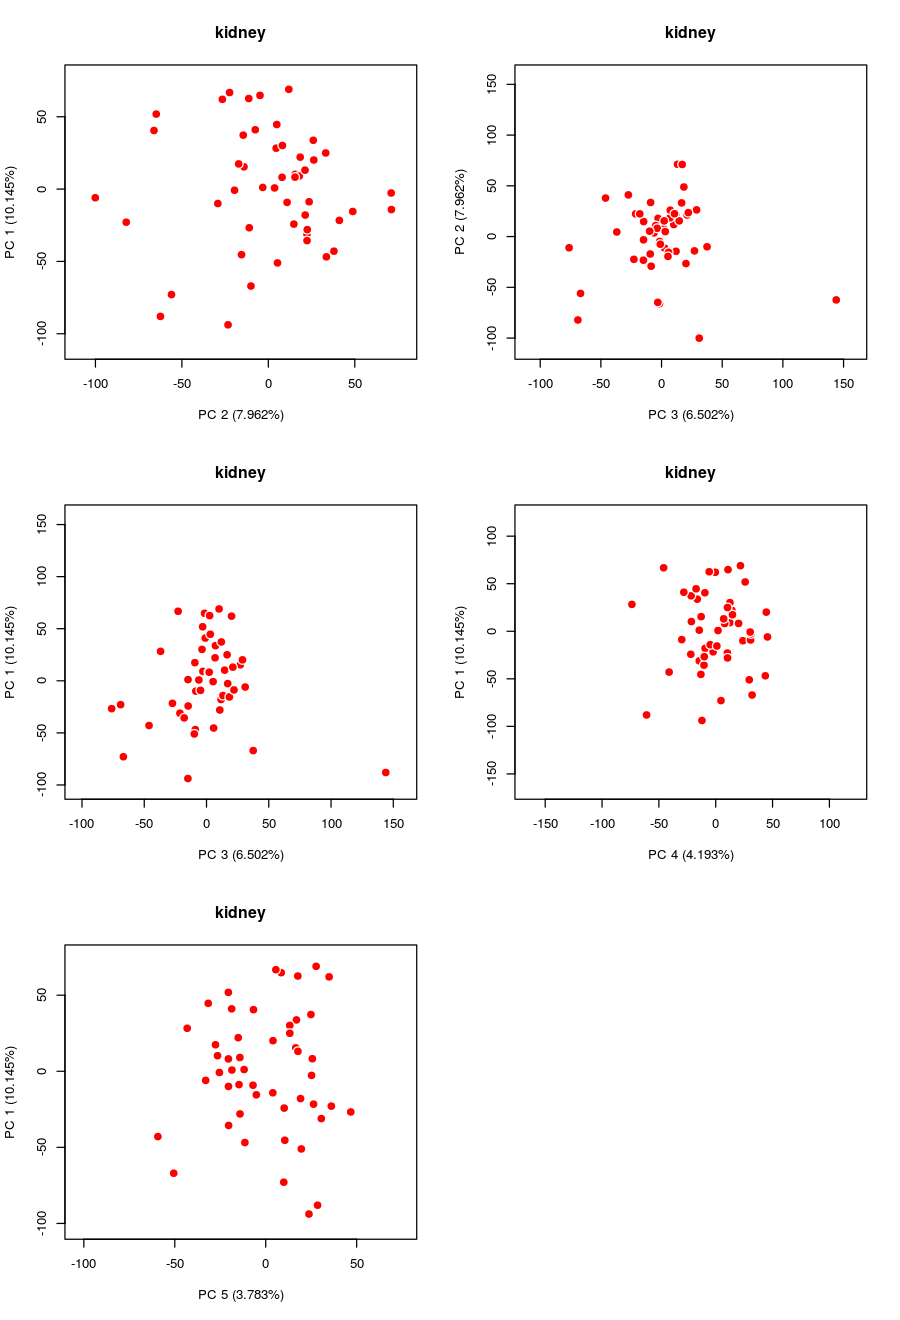

In [22]:
#PCA plots for kidney tissue

#Define plot properties
pc1.pov <- pca.var.kidney$importance[2,1]*100
pc2.pov <- pca.var.kidney$importance[2,2]*100
pc3.pov <- pca.var.kidney$importance[2,3]*100
pc4.pov <- pca.var.kidney$importance[2,4]*100
pc5.pov <- pca.var.kidney$importance[2,5]*100
options(repr.plot.width=7.5, repr.plot.height=11)
colors <- "red"
sample.names <- rownames(dspace.kidney)
scale = 1.1
plot.lim1 = c(min(dspace.kidney[,1], dspace.kidney[,2])*scale, max(dspace.kidney[,1], dspace.kidney[,2])*scale)
plot.lim2 = c(min(dspace.kidney[,3], dspace.kidney[,2])*scale, max(dspace.kidney[,3], dspace.kidney[,2])*scale)
plot.lim3 = c(min(dspace.kidney[,1], dspace.kidney[,3])*scale, max(dspace.kidney[,1], dspace.kidney[,3])*scale)
plot.lim4 = c(min(dspace.kidney[,1], dspace.kidney[,4])*scale*1.6, max(dspace.kidney[,1], dspace.kidney[,4])*scale*1.6)
plot.lim5 = c(min(dspace.kidney[,1], dspace.kidney[,5])*scale, max(dspace.kidney[,1], dspace.kidney[,5])*scale)
pc1.label = paste("PC 1 (",pc1.pov,"%)",sep="")
pc2.label = paste("PC 2 (",pc2.pov,"%)",sep="")
pc3.label = paste("PC 3 (",pc3.pov,"%)",sep="")
pc4.label = paste("PC 4 (",pc4.pov,"%)",sep="")
pc5.label = paste("PC 5 (",pc5.pov,"%)",sep="")

par(mfrow=c(3,2))
#PC1 vs PC2
plot(y=dspace.kidney[,1], x=dspace.kidney[,2], pch=21, col="white", bg=colors, 
     xlim=plot.lim1, ylim=plot.lim1,
     ylab=pc1.label, xlab=pc2.label,
     cex=1.5, 
     main="kidney")

#PC2 vs PC3
plot(y=dspace.kidney[,2], x=dspace.kidney[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim2, ylim=plot.lim2, 
     ylab=pc2.label, xlab=pc3.label,
     cex=1.5, 
     main="kidney")

#PC1 vs PC3
plot(y=dspace.kidney[,1], x=dspace.kidney[,3], pch=21, col="white", bg=colors, 
     xlim=plot.lim3, ylim=plot.lim3, 
     ylab=pc1.label, xlab=pc3.label,
     cex=1.5, 
     main="kidney")

#PC1 vs PC4
plot(y=dspace.kidney[,1], x=dspace.kidney[,4], pch=21, col="white", bg=colors, 
     xlim=plot.lim4, ylim=plot.lim4, 
     ylab=pc1.label, xlab=pc4.label,
     cex=1.5, 
     main="kidney")

#PC1 vs PC5
plot(y=dspace.kidney[,1], x=dspace.kidney[,5], pch=21, col="white", bg=colors, 
     xlim=plot.lim5, ylim=plot.lim5, 
     ylab=pc1.label, xlab=pc5.label,
     cex=1.5, 
     main="kidney")

